In [1]:
! pip install -q kaggle
from google.colab import files 
files.upload() #aqui faz o upload do kaggle.json que voce gerou. Ver link acima.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pedrozeola","key":"7a3378e177ad4bdc2bc66a11d6ca4deb"}'}

In [2]:
! mkdir ~/.kaggle 
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d kmader/food41
!unzip food41.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: images/tacos/1026681.jpg  
  inflating: images/tacos/1030289.jpg  
  inflating: images/tacos/1033196.jpg  
  inflating: images/tacos/1036030.jpg  
  inflating: images/tacos/1042175.jpg  
  inflating: images/tacos/1044043.jpg  
  inflating: images/tacos/1058697.jpg  
  inflating: images/tacos/1059239.jpg  
  inflating: images/tacos/1059326.jpg  
  inflating: images/tacos/1066762.jpg  
  inflating: images/tacos/1070967.jpg  
  inflating: images/tacos/1073468.jpg  
  inflating: images/tacos/1075296.jpg  
  inflating: images/tacos/1085243.jpg  
  inflating: images/tacos/108529.jpg  
  inflating: images/tacos/1086014.jpg  
  inflating: images/tacos/108945.jpg  
  inflating: images/tacos/1089575.jpg  
  inflating: images/tacos/1091159.jpg  
  inflating: images/tacos/1101369.jpg  
  inflating: images/tacos/1109058.jpg  
  inflating: images/tacos/1109744.jpg  
  inflating: images/tacos/1119371.jpg  
  inflating: images/tac

In [ ]:
import os
os.remove('food41.zip')


In [3]:
images_per_class_train = 750
images_per_class_test = 250

n_classes = 10

In [4]:
import os
with open('meta/meta/train.txt') as trainfile:
    trainlines = trainfile.readlines()
    trainlines = trainlines[0:images_per_class_train*n_classes]
    trainlines = [line.rstrip()+'.jpg' for line in trainlines]

with open('meta/meta/test.txt') as testfile:
    testlines = testfile.readlines()
    testlines = testlines[0:images_per_class_test*n_classes]

    testlines = [line.rstrip()+'.jpg' for line in testlines]

!mkdir train/
!mkdir test/

#create directories
with open('meta/meta/classes.txt') as classfile:
    classlines = classfile.readlines()
    classlines = classlines[0:n_classes]
    classlines = [line.rstrip() for line in classlines]

for class_ in classlines:
    try:
        os.makedirs('train/'+class_)
    except:
        pass
    try:
        os.makedirs('test/'+class_)
    except:
        pass

#move files to corresponding folder
for tl in trainlines:
    try:
        os.replace('images/'+tl, 'train/'+tl)
    except:
        pass
for tl in testlines:
    try:
        os.replace('images/'+tl, 'test/'+tl)
    except:
        pass

In [5]:
#clean up
for class_ in classlines:
    try:
        os.rmdir('images/'+class_)
    except:
        pass
try:
    os.rmdir('images/')
except:
    pass

In [6]:
from PIL import Image 

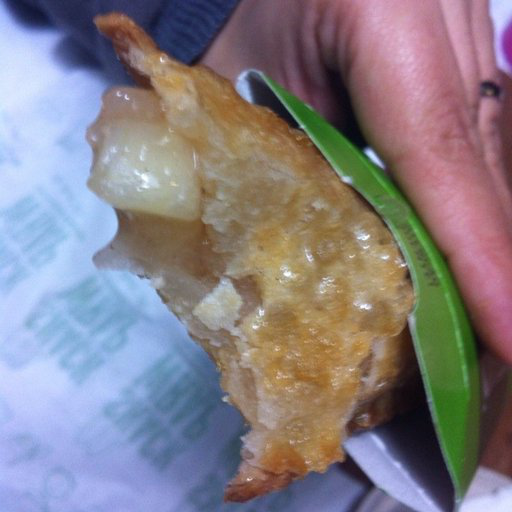

In [7]:
img = Image.open('test/apple_pie/1011328.jpg')
img

In [8]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
from tensorflow.keras import layers, models

In [9]:
datagen = ImageDataGenerator(
                horizontal_flip=True,
                rescale=(1./128) - 1
              )

datagen_test = ImageDataGenerator(
              rescale=(1./128) - 1
              )

In [10]:
train_batches = datagen.flow_from_directory('train/', batch_size=32, class_mode = 'categorical', target_size=(224, 224))
test_batches = datagen_test.flow_from_directory('test/', batch_size=32, class_mode = 'categorical', target_size=(224, 224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
input_shape = (224, 224, 3)

img_dims = 224

model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(5, 5), strides=(2, 2), padding='valid',input_shape=(224,224,3)))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, kernel_size=(5, 5), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))

model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3), strides=(2, 2), padding='valid'))
model.add(layers.BatchNormalization(axis=3, scale=False))


model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))


model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(n_classes, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 110, 110, 32)     96        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 110, 110, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 32)        25632     
                                                                 
 batch_normalization_1 (Batc  (None, 53, 53, 32)       96        
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 53, 53, 32)        0

In [12]:
sgd = SGD(learning_rate=0.1)

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])


In [15]:
checkpoint_path = "training_1/cp.ckpt"
model.load_weights(checkpoint_path)

In [17]:
n_classes = 10
batch_size = 32

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                verbose=1)

hist = model.fit(
                train_batches,
                steps_per_epoch = images_per_class_train * n_classes / batch_size,
                epochs=10,
                validation_data = test_batches,
                validation_steps= images_per_class_test * n_classes / batch_size,
                callbacks=[cp_callback] 
                )
#################################################################################
# O modelo foi treinado 10 epochs e depois + 10, devido a problemas com a conexão 
# com o colab! 
#################################################################################

Epoch 1/10
235/234 [==============================] - ETA: 0s - loss: 0.7755 - accuracy: 0.7293
Epoch 00001: saving model to training_1/cp.ckpt
234/234 [==============================] - 305s 1s/step - loss: 0.7755 - accuracy: 0.7293 - val_loss: 1.5319 - val_accuracy: 0.5592
Epoch 2/10
235/234 [==============================] - ETA: 0s - loss: 0.7735 - accuracy: 0.7284
Epoch 00002: saving model to training_1/cp.ckpt
234/234 [==============================] - 301s 1s/step - loss: 0.7735 - accuracy: 0.7284 - val_loss: 2.0180 - val_accuracy: 0.4804
Epoch 3/10
235/234 [==============================] - ETA: 0s - loss: 0.7302 - accuracy: 0.7472
Epoch 00003: saving model to training_1/cp.ckpt
234/234 [==============================] - 301s 1s/step - loss: 0.7302 - accuracy: 0.7472 - val_loss: 1.5569 - val_accuracy: 0.5508
Epoch 4/10
235/234 [==============================] - ETA: 0s - loss: 0.6745 - accuracy: 0.7595
Epoch 00004: saving model to training_1/cp.ckpt
234/234 [===================

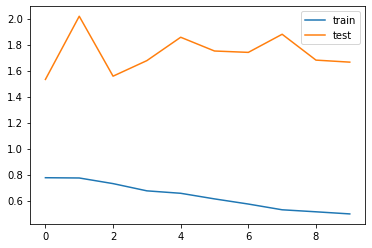

In [19]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()

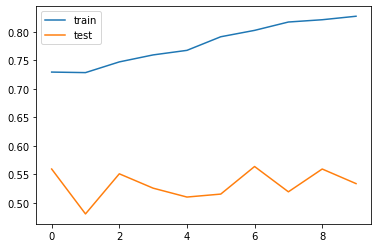

In [21]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()

In [24]:
model.save("mysavedmodel")

INFO:tensorflow:Assets written to: mysavedmodel/assets
